<a href="https://colab.research.google.com/github/mjosecop/CatDog/blob/main/CatDog2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cat-and-dog:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F23777%2F30378%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240503%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240503T110137Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D77529e4b2624d4882e6494810a9ca848f2cfe9f9b40697e91a3c25c67a1eae2b9a9eb0f702de628c05575397fc7d823a697d4f69cb377027e69db2d7548697cf82cda26fc6b11d042f0e015d2c5225d6e598afe13498698ec2a8684f5c724c232e3bbfec2991fceeca7146a6ba17b942eb607d5002ce146ca147d50b28e4b2432c26d0f2ca891825818c2b319fb7b4d1b3f228f7c991ce403736c0d20baacb2e286a07f4d2c0079c92c19dccfe74455cbd1db28049c2e4a7cf8ff6f0479be7f93145ff5511691e832adf4660e5586aee60386923d90a5870c26da53ccd310e3fa606aca7120a42569b6293dd509bc8a328192b3c85da54a1c6b3cfae7a3c5855'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 228487605 bytes downloaded
Downloaded and uncompressed: cat-and-dog
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#         for filename in filenames:
#             print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

![image.png](attachment:204755c2-a45b-4284-8b5b-6a8687d31607.png)

In [4]:
import PIL
print('Pillow Version:', PIL.__version__)

from PIL import Image

Pillow Version: 9.4.0


uint8
(449, 432, 3)


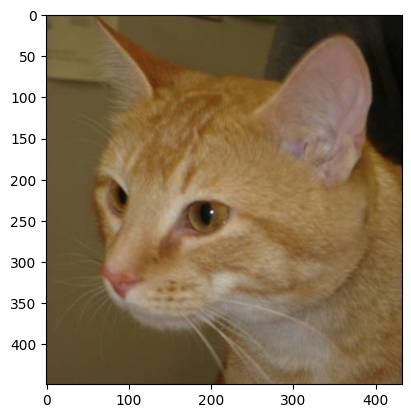

In [5]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3664.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

### Typical steps for loading custom dataset for Deep Learning Models
* Open the image file. The format of the file can be JPEG, PNG, BMP, etc.
* Resize the image to match the input size for the Input layer of the Deep Learning model.
* Convert the image pixels to float datatype.
* Normalize the image to have pixel values scaled down between 0 and 1 from 0 to 255.
* Image data for Deep Learning models should be either a numpy array or a tensor object.

In [6]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

(339, 500, 3)
(331, 400, 3)
(360, 362, 3)
(375, 499, 3)
(395, 500, 3)


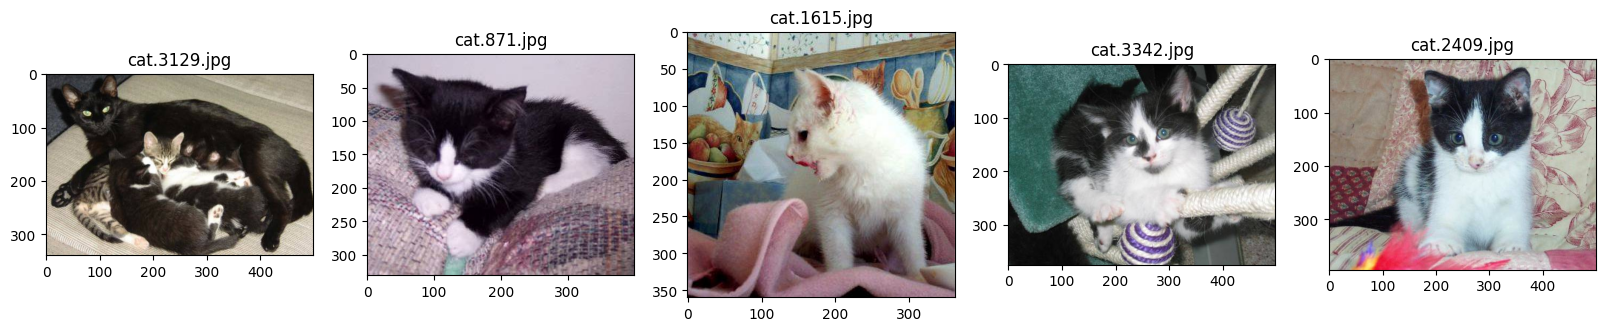

In [7]:
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/cat-and-dog/training_set/training_set/cats'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

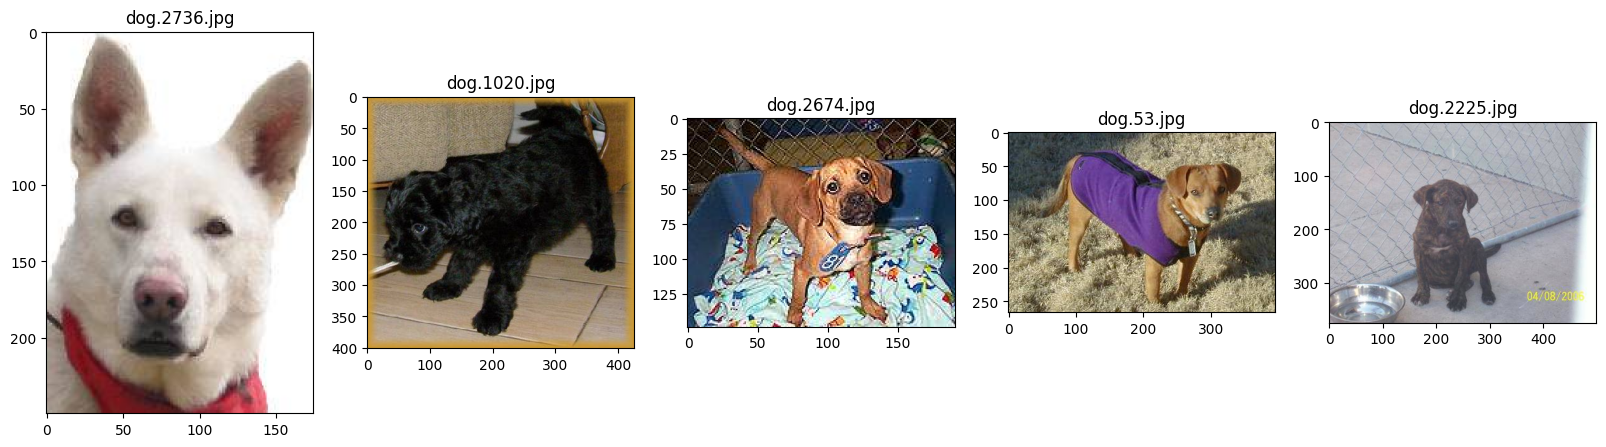

In [8]:
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/cat-and-dog/training_set/training_set/dogs'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

## **Data Ingestion**
now we need to create a function which takes goes into our directory, goes into the folders and transforms our images into a dataframe of required shape and size for keras to work its magic on

In [9]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder='/kaggle/input/cat-and-dog/training_set/training_set/'

def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            except:
                break
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset('/kaggle/input/cat-and-dog/training_set/training_set/')

In [10]:
img_data=np.array(img_data)
class_name=np.array(class_name)
img_data.shape

(755, 200, 200, 3)

In [11]:
def dog_cat_mapping(a):
    if a=="dogs":
        return 1
    else:return 0
class_name=list(map(dog_cat_mapping,class_name))
class_name=np.array(class_name)

In [12]:
input_shape=img_data.shape[1:]
input_shape

(200, 200, 3)

In [13]:
def model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model=Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
    model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [14]:
model=model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x=img_data,y=class_name, epochs=10)

Epoch 1/10
24/24 [==============================] - 371s 15s/step - loss: 4.6553 - accuracy: 0.4914
Epoch 2/10
24/24 [==============================] - 352s 15s/step - loss: 0.6927 - accuracy: 0.5245
Epoch 3/10
24/24 [==============================] - 361s 15s/step - loss: 0.6885 - accuracy: 0.6238
Epoch 4/10
24/24 [==============================] - 352s 15s/step - loss: 0.6682 - accuracy: 0.6649
Epoch 5/10
24/24 [==============================] - 357s 15s/step - loss: 0.6166 - accuracy: 0.6768
Epoch 6/10
24/24 [==============================] - 349s 15s/step - loss: 0.4593 - accuracy: 0.8053
Epoch 7/10
24/24 [==============================] - 359s 15s/step - loss: 0.2597 - accuracy: 0.8901
Epoch 8/10
24/24 [==============================] - 354s 15s/step - loss: 0.1100 - accuracy: 0.9603
Epoch 9/10
24/24 [==============================] - 351s 15s/step - loss: 0.0543 - accuracy: 0.9907
Epoch 10/10
24/24 [==============================] - 348s 15s/step - loss: 0.0201 - accuracy: 0.9974

In [15]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder='/kaggle/input/cat-and-dog/test_set/test_set/'


# extract the image array and class name
img_data_test, class_name_test =create_dataset('/kaggle/input/cat-and-dog/test_set/test_set/')

In [16]:
img_data_test=np.array(img_data_test)
class_name_test=list(map(dog_cat_mapping,class_name_test))
class_name_test=np.array(class_name_test)

In [17]:
preds=model.predict(img_data_test).round().astype(int)

7/7 [==============================] - 26s 4s/step


In [18]:
flat_pred = [item for sublist in preds for item in sublist]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(class_name_test, flat_pred)
print("The Accuracy is: %2f" % accuracy)

The Accuracy is: 0.547264


In [19]:
model.save_weights('model_wieghts_catdog.h5')
model.save('model_keras_catdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


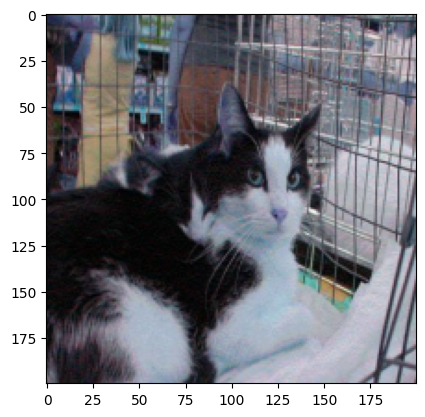

In [20]:
plt.imshow(img_data_test[10])

In [36]:
model.save('/content/catdog')


# TODO:
#     Post the content on streamlit to create a web application
#     check for catdog
from google.colab import files
files.download('/content/catdog')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
import os
files_in_content = os.listdir('/content')
print(files_in_content)




['.config', 'model_wieghts_catdog.h5', 'catdog', 'model_keras_catdog.h5', 'sample_data']


In [35]:
import os

# Ruta del directorio raíz
root_dir = '/content'

# Función para buscar el archivo catdog recursivamente
def find_file(root_dir, target_file):
    for root, dirs, files in os.walk(root_dir):
        if target_file in files:
            return os.path.join(root, target_file)
    return None

# Buscar el archivo catdog
catdog_path = find_file(root_dir, 'catdog')

# Imprimir la ruta del archivo catdog
print("Ruta del archivo catdog:", catdog_path)


Ruta del archivo catdog: None


In [38]:
import os

# Obtener la ruta completa del archivo catdog
catdog_path = '/content/catdog'

# Obtener la URL del archivo catdog
catdog_url = 'file://' + os.path.abspath(catdog_path)

print("URL del archivo catdog:", catdog_url)




URL del archivo catdog: file:///content/catdog


In [39]:
import os

# Obtener la ruta del directorio de descargas
downloads_dir = os.path.join(os.path.expanduser('~'), 'Downloads')

# Ruta completa para guardar el archivo catdog en Descargas
output_path = os.path.join(downloads_dir, 'catdog')

print("Ruta de descargas completa para guardar catdog:", output_path)


Ruta de descargas completa para guardar catdog: /root/Downloads/catdog


In [40]:
!pip install gdown
import gdown

url = 'file:///content/catdog'
output = '/root/Downloads/catdog'
gdown.download(url, output, quiet=False)


InvalidSchema: No connection adapters were found for 'file:///content/catdog'

In [42]:
from google.colab import files
import os

# Obtener la ruta del directorio de descargas
downloads_dir = os.path.join(os.path.expanduser('~'), 'Downloads')

# Ruta completa para guardar el archivo catdog en Descargas
output_path = os.path.join(downloads_dir, 'catdog')

# Descargar el archivo catdog desde Google Colab
files.download('/content/catdog')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>